### Predictive Model for No show-up patients

**by Fareeda Saleh**

#### Introduction:


First I will load the necessary packages for this analysis.

In [110]:
# Import libraries necessary for this project
import pandas as  pd 
import numpy  as  np
from IPython.display import display # allow to use display
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns


In [111]:
# # Load the Census dataset 
Patient = pd.read_csv("C:/Users\Fralh\Downloads\KaggleV2-May-2016.csv")
# display first raw
display(Patient.head(n=1))



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


let's take a general overview about these data:

In [112]:
 ##Dimensions of the Dataset
print  (Patient.shape) 

(110527, 14)


So, we have 14 variables and 110527 records.

### Data Wringling


Now in this step, I will prepare the data for the analysis by checking if there is missing values or invalid values.

In [113]:
Patient.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


good, there are no missing values!! now I will classify the variables into four groups patient information, appointment information, health situation and the general information, I think this will help me in data preparation process.


** 1- Patient Information**

- PatientId 
- Gender
- Age



I will ignore Patient Id as I think it has no importance in our analysis. Now let check the values of Gender and Age:


In [114]:
 # delete the patient Id 
del Patient["PatientId"]
# check the values of the rest of patient information group.
print ( "Gender:{}".format(list(set (Patient["Gender"]))))
       
print ( "Age : {}".format(list(set(Patient["Age"]))))

Gender:['M', 'F']
Age : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1]


There are tow values for gender M = male and F= Female so no need to perform any cleaning or auditing process, but in the Age variable We can see strang values for some patients like 100 and above and negative values, I wonder if the negative values mean baby before born or it may come from a typo error however as I'm not sure about this value I will delete it, also I check in the  [geoba.se](http://www.geoba.se/country.php?cc=BR&year=2017) and I found the average of life expectancy in Brazil is about 74.06 and there are just 4,388 people have age 100 and above so I will choose to delete patients who have age in this range.In addition we will classify the patient according to their age to child, adult and senior.


In [115]:
 Patient = Patient[(Patient["Age"] < 100) & (Patient["Age"]>0)] 

In [116]:
def FormatAge (age):
    if age['Age']>0 and age['Age']<=17 :
        return 'Child'
    elif age['Age']>=18 and age['Age'] <50:
        return 'Adult'
    else:
        return 'Senior'

In [117]:
Patient['AgeClass'] = Patient.apply(FormatAge,axis=1)

 **2- Appointment Information**
 
- AppointmentID 
- ScheduledDay
- AppointmentDay



for the group of Appointment Information, I will remove the AppointmentID from our dataset and reformate the ScheduledDay, in addition, i will create a new variable WaitingDay which mean the duration between the scheduled date and the appointment date.


In [118]:
# AppointmentID 
del Patient["AppointmentID"]  
 # Reformatting the Scheduled Date and Appointment Day 
def AppointmentFormat(Patient):  
    Patient["ScheduledDay"] = pd.to_datetime(Patient["ScheduledDay"], format="%Y/%m/%d %H:%M:%S")
    Patient["AppointmentDay"] = pd.to_datetime(Patient["AppointmentDay"], format="%Y/%m/%d %H:%M:%S") 
    Patient["Scheduledyear"]= Patient["ScheduledDay"].dt.year 
    Patient["Scheduledmonth"]= Patient["ScheduledDay"].dt.month   
    Patient["Scheduledweek"]= Patient["ScheduledDay"].dt.weekday   
    Patient["Scheduledhour"]= Patient["ScheduledDay"].dt.hour 
# Appointment Day Reformatting and create additional col 
    Patient["Appointmentyear"]= Patient["AppointmentDay"].dt.year  
    Patient["Appointmentmonth"]= Patient["AppointmentDay"].dt.month   
    Patient["Appointmentweek"]= Patient["AppointmentDay"].dt.weekday 
    Patient['WaitingDay']=np.where(Patient.ScheduledDay.dt.date==Patient.AppointmentDay.dt.date, 0, Patient.AppointmentDay.sub(Patient.ScheduledDay))


AppointmentFormat(Patient) 
print(" `AppointmentDay` => {}".format(np.sort(Patient.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

print(",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,")


print(" `AppointmentDay` => {}".format(np.sort(Patient.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))




 `AppointmentDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '2016-04-18' '2

** 3.Health Situation**
- Hypertension 
- Diabetes
- Alcoholism
- Handcap


In [119]:
 # correcte the misspiling for Hipertension clumane
Patient = Patient.rename(columns = {'Hipertension':'Hypertension'}) 

In [120]:
#chek the valus of varibles. 
print ("Hypertension:{}".format(list(set (Patient["Hypertension"]))) )
print ("Diabetes : {}".format(list(set(Patient["Diabetes"])))) 
print ("Alcoholism:{}".format(list(set(Patient["Alcoholism"])))) 
print ("Handcap : {}".format(list(set(Patient["Handcap"]))))

Hypertension:[0, 1]
Diabetes : [0, 1]
Alcoholism:[0, 1]
Handcap : [0, 1, 2, 3, 4]


**4- Genral Infomation**
- SMS_received
- No-show
- Neighbourhood
- Scholarship



In [121]:
print ("SMS:{}".format(list(set (Patient["SMS_received"])))) 
print ("No-show : {}".format(list(set(Patient["No-show"])))) 
print ("Scholarship:{}".format(list(set(Patient["Scholarship"]))))  
print ("Neighbourhood : {}".format(list(set(Patient["Neighbourhood"])))) 

SMS:[0, 1]
No-show : ['No', 'Yes']
Scholarship:[0, 1]
Neighbourhood : ['GURIGICA', 'ROMÃO', 'MÁRIO CYPRESTE', 'PARQUE MOSCOSO', 'CRUZAMENTO', 'SANTOS REIS', 'SANTO ANTÔNIO', 'BONFIM', 'SANTA HELENA', 'ILHA DE SANTA MARIA', 'FONTE GRANDE', 'NOVA PALESTINA', 'DO QUADRO', 'SEGURANÇA DO LAR', 'SANTO ANDRÉ', 'FRADINHOS', 'ILHAS OCEÂNICAS DE TRINDADE', 'JARDIM CAMBURI', 'PRAIA DO SUÁ', 'TABUAZEIRO', 'PARQUE INDUSTRIAL', 'NAZARETH', 'REPÚBLICA', 'SOLON BORGES', 'JABOUR', 'VILA RUBIM', 'MONTE BELO', 'CARATOÍRA', 'HORTO', 'ILHA DO FRADE', 'AEROPORTO', 'UNIVERSITÁRIO', 'JUCUTUQUARA', 'CONQUISTA', 'CONSOLAÇÃO', 'ESTRELINHA', 'JESUS DE NAZARETH', 'ANDORINHAS', 'SANTA TEREZA', 'DO MOSCOSO', 'GRANDE VITÓRIA', 'SÃO JOSÉ', 'SÃO PEDRO', 'ARIOVALDO FAVALESSA', 'SANTA CECÍLIA', 'SÃO CRISTÓVÃO', 'ILHA DAS CAIEIRAS', 'SANTA LUÍZA', 'FORTE SÃO JOÃO', 'SANTOS DUMONT', 'SANTA CLARA', 'ENSEADA DO SUÁ', 'SANTA LÚCIA', 'ITARARÉ', 'SÃO BENEDITO', 'ILHA DO PRÍNCIPE', 'GOIABEIRAS', 'SANTA MARTHA', 'DO CABRAL', 'MAR

In [122]:
print  (Patient.shape) 

(106976, 21)


ok, we start with 14 varibles and now we end up with 21 varibles,I think the data seems to be clean enughe and valied to start the analysis.


### Data Analysis:


**first let see How many patient attende thier appointment :**


In [123]:
 print (Patient.groupby("No-show").size()) 

No-show
No     85299
Yes    21677
dtype: int64


 (20.27%) of the Patients not attend the appointment and approximately (79.73%) of them came to their appointment, so we will try to go deeper in the data and identify how each features play roles in this problem.


** How the  Patient gender play role in this analysis?? **

In [124]:

print('Distribution of Gender')
print(Patient.groupby(['Gender']).Gender.count())



Distribution of Gender
Gender
F    70109
M    36867
Name: Gender, dtype: int64


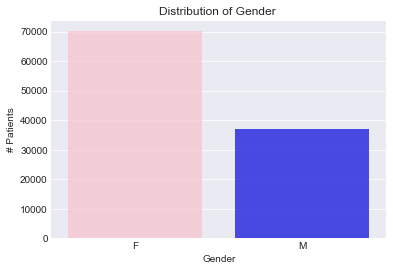

In [125]:
sns.set_style('darkgrid')
sns.countplot(Patient['Gender'], alpha =.80, palette= ['pink','blue'])
plt.title('Distribution of Gender ')
plt.ylabel('# Patients')
plt.show()

In [126]:

print(Patient.groupby('Gender')['No-show'].value_counts(normalize = True))


Gender  No-show
F       No         0.796431
        Yes        0.203569
M       No         0.799143
        Yes        0.200857
Name: No-show, dtype: float64


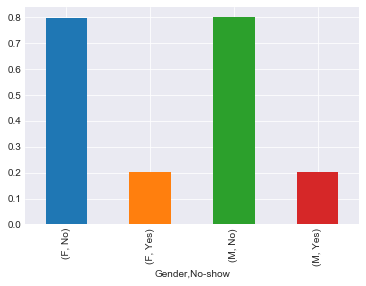

In [127]:
Patient.groupby('Gender')['No-show'].value_counts(normalize = True).plot(kind='bar')
plt.show()




We can see the women are most likely visit the hospitals than men this may due to several reasons : women take care about her health than men and also the pregnant woman usually visit the hospital several time during her pregnancy, and we may consider that the population mean for women is greater than mean in Brazil, but when we foucse on the (Show up) statuse we can see   79.6% of wamen attened to their appointment compared to 79.9% of men, so women and men are most likly to have the same rate of attendance.

** Does the Age affected the patient attendance to their appointment? Dose the elderly woman take care about her health more than elderly man?**

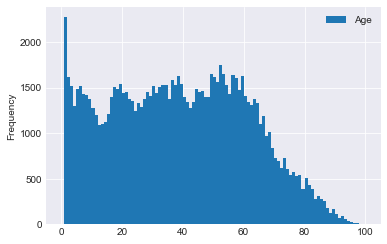

In [128]:
##Age Distrabuation
Patient.plot(kind = "hist",y = "Age",bins =100,range= (0,100)) 
plt.show() 

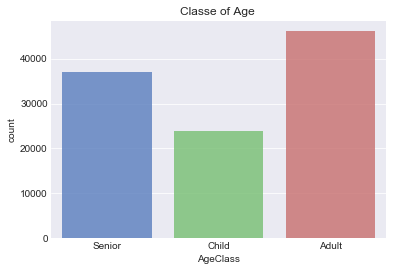

AgeClass  No-show
Adult     No         0.776539
          Yes        0.223461
Child     No         0.775252
          Yes        0.224748
Senior    No         0.837542
          Yes        0.162458
Name: No-show, dtype: float64


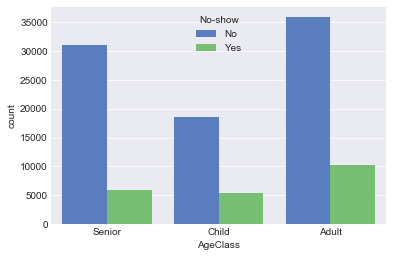

In [129]:
# number of patient according to thier aGE CLAss
sns.set_style('darkgrid')

sns.countplot(Patient['AgeClass'], alpha =.80,palette="muted")
plt.title('Classe of Age ')
plt.show()

print (Patient.groupby('AgeClass')['No-show'].value_counts(normalize = True))

sns.set_style('darkgrid')
fig = sns.countplot(x='AgeClass', data=Patient,hue='No-show', palette="muted");
plt.show()


In [130]:

pd.pivot_table(Patient,index=['AgeClass','No-show','Gender'],values=["Age"])


Age
AgeClass No-show Gender           
Adult    No      F       33.572489
                 M       34.514534
         Yes     F       32.584786
                 M       33.333793
Child    No      F        8.753021
                 M        7.659483
         Yes     F        9.609187
                 M        8.618356
Senior   No      F       63.419264
                 M       63.633761
         Yes     F       62.957364
                 M       62.999470

Most patients were between the age of 18 and 49 and the patients below 18 years has the minimum rate of visiting the hospital. However, when we see the show-up status we found patients above 50 years are most likely did not attend their appointment and also the gender did not play any role in this analysis.

** Scheduled day , Appointmeint Day and Waiting Day **

Text(0.5,1,'Scheduledmonth')

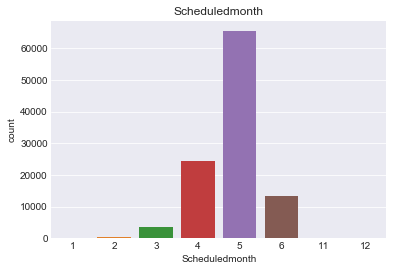

In [131]:
sns.countplot(Patient['Scheduledmonth'])
plt.title('Scheduledmonth')


Text(0.5,1,'Appointmentmonth')

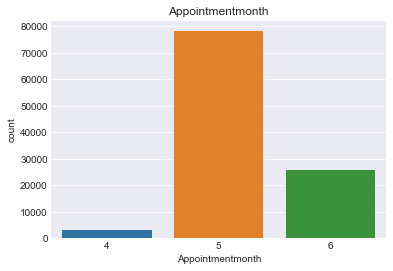

In [132]:
sns.countplot(Patient['Appointmentmonth'])
plt.title('Appointmentmonth')

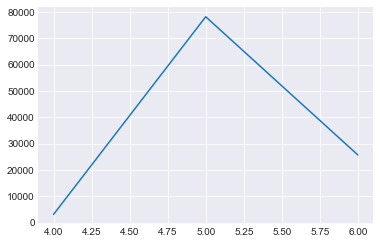

In [133]:
Patient.Appointmentmonth.value_counts().sort_index().plot()

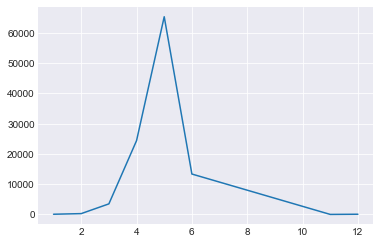

In [134]:
Patient.Scheduledmonth.value_counts().sort_index().plot()

ok, in the appointment month it just includes 3 months!! on another hand the Scheduled month missed the months (7 to 10). However, in both diagrams, the most rate appointment was in may which is the end of Autumn in Brazile.

In [135]:

print ("Appointment month : {}".format(list(set(Patient["Appointmentmonth"]))) )
print ( "Scheduled month : {}".format(list(set(Patient["Scheduledmonth"]))))

Appointment month : [4, 5, 6]
Scheduled month : [1, 2, 3, 4, 5, 6, 11, 12]


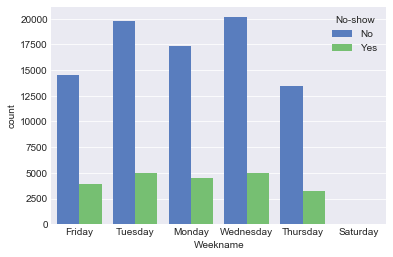

In [136]:
Patient["Weekname"] = Patient.AppointmentDay.dt.weekday_name
fig = sns.countplot(x='Weekname', data=Patient,hue='No-show', palette="muted");
plt.show()


In [137]:

Patient['WaitingDay'] = Patient['WaitingDay'].astype('timedelta64[D]')
print(Patient.WaitingDay.max())
#print (Patient.WaitingDay.min())
## delete the nagative values
##check the nigative valuues 
#Patient.loc[Patient['WaitingDay']<0]
Patient=Patient[Patient.WaitingDay>=0]

178.0


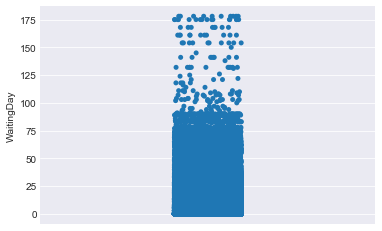

In [138]:
## waiting day distrbuation
sns.stripplot(y="WaitingDay",data=Patient, jitter=True)


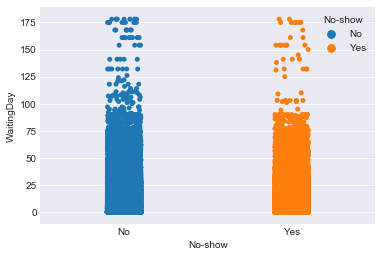

In [139]:
sns.stripplot(x="No-show" ,y="WaitingDay",hue="No-show",data=Patient, jitter=True)


The patient tends to attend his appointment in the middle of the week, and no show up at the end of the week, especially in Thursday. If we focus on the waiting day and how the data is distribution we can see there is 
a drop in the appointment number after the three months of waiting especially for the group who not came to there appointments.

**How the Sms reminder and handicap variables affect the patient attendance ??**

In [140]:
print(Patient["Handcap"].value_counts())
print(Patient.groupby('Handcap')['No-show'].value_counts(normalize = True))



0    104739
1      2033
2       183
3        13
4         3
Name: Handcap, dtype: int64
Handcap  No-show
0        No         0.796924
         Yes        0.203076
1        No         0.822430
         Yes        0.177570
2        No         0.797814
         Yes        0.202186
3        No         0.769231
         Yes        0.230769
4        No         0.666667
         Yes        0.333333
Name: No-show, dtype: float64


In [141]:
print(Patient["SMS_received"].value_counts())

print(Patient.groupby('SMS_received')['No-show'].value_counts(normalize = True))


0    72388
1    34583
Name: SMS_received, dtype: int64
SMS_received  No-show
0             No         0.832790
              Yes        0.167210
1             No         0.723332
              Yes        0.276668
Name: No-show, dtype: float64


### Predictive Model

In [142]:
## convert to numercal
Patient = Patient.replace('Yes',1)
Patient = Patient.replace('No',0)


In [143]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Patient["Neighbourhood"])
Patient["Neighbourhood"]=le.transform(Patient["Neighbourhood"])

le.fit(Patient["Gender"])
Patient["Gender"]=le.transform(Patient["Gender"])




In [144]:
display(Patient.head(n=1))

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,...,AgeClass,Scheduledyear,Scheduledmonth,Scheduledweek,Scheduledhour,Appointmentyear,Appointmentmonth,Appointmentweek,WaitingDay,Weekname
0,0,2016-04-29 18:38:08,2016-04-29,62,39,0,1,0,0,0,...,Senior,2016,4,4,18,2016,4,4,0.0,Friday


In [145]:
Patient = Patient.drop(['AgeClass','Weekname','ScheduledDay','AppointmentDay'],axis=1)

In [146]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
numerical = ['Age', 'Neighbourhood', 'Scheduledyear', 'Scheduledmonth', 'Scheduledweek','Scheduledhour','Appointmentyear','Appointmentmonth','Appointmentweek','WaitingDay']
PatientScaled = pd.DataFrame(data = Patient)
PatientScaled[numerical] = scaler.fit_transform(PatientScaled[numerical])


In [147]:

ShowUp = Patient['No-show']
features = Patient.drop('No-show',axis = 1)

In [148]:
from sklearn.cross_validation import train_test_split
#  Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,ShowUp, test_size=0.2, random_state=0)

# Show the results of the split

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 85576 samples.
Testing set has 21395 samples.


In [149]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [150]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
clf = GaussianNB()
predictions = (clf.fit(X_train, y_train)).predict(X_test)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format( f1_score(y_test, predictions)))


report = classification_report(y_test,predictions )
print (report)

Accuracy score on testing data: 0.7664
F-score on testing data: 0.1939
             precision    recall  f1-score   support

          0       0.81      0.92      0.86     17083
          1       0.32      0.14      0.19      4312

avg / total       0.71      0.77      0.73     21395



In [151]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
# Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

# Create the parameters list you wish to tune
parameters = {'n_estimators' : [25,50,100,200,400],   # default=100
              'max_depth'    : [1,2,3,4,5],        # default=3
              'learning_rate': [0.01,0.03,0.1,0.2,0.3]} # default=0.1

#  Make an f1_score scoring object using make_scorer()
scorer = make_scorer( f1_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer, n_jobs=10)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))

print("The best parameters are %s"
      % (grid_obj.best_params_))


report = classification_report(y_test,predictions )
print (report)


Unoptimized model
------
Accuracy score on testing data: 0.7979
F-score on testing data: 0.0087

Optimized Model
------
Final accuracy score on the testing data: 0.7934
Final F-score on the testing data: 0.2093
The best parameters are {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 400}
             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17083
          1       0.39      0.00      0.01      4312

avg / total       0.72      0.80      0.71     21395



In [152]:
from sklearn.ensemble import RandomForestClassifier
#  Initialize the classifier
clf = RandomForestClassifier(random_state=1)


#  Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[1,2,3,4,5,6,7,8,9,10], 'criterion': ['gini', 'entropy'], 
                  'min_samples_split': [2,3,4,5,6,7,8,9,10]}


#  Make an f1_score scoring object using make_scorer()
scorer = make_scorer( f1_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer, n_jobs=10)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))

print("The best parameters are %s"
      % (grid_obj.best_params_))

report = classification_report(y_test,predictions )
print (report)


Unoptimized model
------
Accuracy score on testing data: 0.7883
F-score on testing data: 0.2502

Optimized Model
------
Final accuracy score on the testing data: 0.7214
Final F-score on the testing data: 0.3232
The best parameters are {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 1}
             precision    recall  f1-score   support

          0       0.82      0.94      0.88     17083
          1       0.44      0.18      0.25      4312

avg / total       0.74      0.79      0.75     21395



In [153]:
from xgboost import XGBClassifier
#  Initialize the classifier
clf = XGBClassifier()

#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'max_depth':[3], 'n_estimators':[300], 'learning_rate':[0.05]}


#  Make an f1_score scoring object using make_scorer()
scorer = make_scorer( f1_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer, n_jobs=10)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))

print("The best parameters are %s"
      % (grid_obj.best_params_))


report = classification_report(y_test,predictions )
print (report)



ModuleNotFoundError: No module named 'xgboost'

In [154]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.linear_model import LogisticRegression
# Initialize the classifier
clf = LogisticRegression(random_state = 77)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

#  Make an f1_score scoring object using make_scorer()
scorer = make_scorer( f1_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer, n_jobs=10)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))

print("The best parameters are %s"
      % (grid_obj.best_params_))

report = classification_report(y_test,predictions )
print (report)


Unoptimized model
------
Accuracy score on testing data: 0.7943
F-score on testing data: 0.0401

Optimized Model
------
Final accuracy score on the testing data: 0.7941
Final F-score on the testing data: 0.0409
The best parameters are {'C': 100.0, 'penalty': 'l1'}
             precision    recall  f1-score   support

          0       0.80      0.99      0.88     17083
          1       0.34      0.02      0.04      4312

avg / total       0.71      0.79      0.71     21395



In [155]:
#  Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
#  Initialize the classifier
clf = AdaBoostClassifier(random_state=0)
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[75,200,500],'learning_rate':[1.0,1.5,2.0]}

#  Make an f1_score scoring object using make_scorer()
scorer = make_scorer( f1_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer, n_jobs=10)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

importances = model.feature_importances_


# Report the before-and-afterscores

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))

print("The best parameters are %s"
      % (grid_obj.best_params_))

print("The Featuears Importaint:%s" % (importances))
report = classification_report(y_test,predictions )
print (report)


Unoptimized model
------
Accuracy score on testing data: 0.7980
F-score on testing data: 0.0096

Optimized Model
------
Final accuracy score on the testing data: 0.7985
Final F-score on the testing data: 0.0000
The best parameters are {'learning_rate': 2.0, 'n_estimators': 200}
The Featuears Importaint:[0.02 0.3  0.22 0.02 0.   0.02 0.02 0.   0.02 0.   0.02 0.04 0.1  0.
 0.04 0.06 0.12]
             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17083
          1       0.41      0.00      0.01      4312

avg / total       0.72      0.80      0.71     21395



C:\Users\Fralh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
display(features.head(n=1))

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Scheduledyear,Scheduledmonth,Scheduledweek,Scheduledhour,Appointmentyear,Appointmentmonth,Appointmentweek,WaitingDay
0,0,0.622449,0.4875,0,1,0,0,0,0,1.0,0.272727,0.8,0.8,0.0,0.0,0.8,0.0


In [157]:
import matplotlib.pyplot as pl
importances = clf.feature_importances_
clf = AdaBoostClassifier(random_state=0)

feature_importance = pd.Series(importances,index=['Gender','Age','Neighbourhood',
                                                  'Scholarship','Hypertension','Diabetes','Alcoholism',
                                                  'Handcap','SMS_received','Scheduledyear','Scheduledmonth',
                                                  'Scheduledweek','Scheduledhour','Appointmentyear','Appointmentmonth',
                                                  'Appointmentweek','WaitingDay'
                                                  ])

print ('\n')
print ("Feature Importance:") 
print (feature_importance)






Feature Importance:
Gender              0.02
Age                 0.30
Neighbourhood       0.22
Scholarship         0.02
Hypertension        0.00
Diabetes            0.02
Alcoholism          0.02
Handcap             0.00
SMS_received        0.02
Scheduledyear       0.00
Scheduledmonth      0.02
Scheduledweek       0.04
Scheduledhour       0.10
Appointmentyear     0.00
Appointmentmonth    0.04
Appointmentweek     0.06
WaitingDay          0.12
dtype: float64


In [159]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

best_clf= RandomForestClassifier(criterion= 'entropy', min_samples_split= 2, n_estimators= 1)
# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, best_predictions)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, reduced_predictions)))

report = classification_report(y_test,best_predictions )
print (report)


report = classification_report(y_test,reduced_predictions )
print (report)





Final Model trained on full data
------
Accuracy on testing data: 0.7985
F-score on testing data: 0.0000

Final Model trained on reduced data
------
Accuracy on testing data: 0.7194
F-score on testing data: 0.3152
             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17083
          1       0.00      0.00      0.00      4312

avg / total       0.64      0.80      0.71     21395

             precision    recall  f1-score   support

          0       0.83      0.82      0.82     17083
          1       0.31      0.32      0.32      4312

avg / total       0.72      0.72      0.72     21395



C:\Users\Fralh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fralh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Conclusion and future work:

I try to identify how each variable in the dataset could affect the patient show up status and I found the adult patient tend to came to their appointment more than other ages also the patient are more likely to show up in middle of week more than the start of week and finally I built a predictive model to predict the patient who no show up, However there a lot to do to explore more variables in this data set and also the predictive model need to optimize.